In [1]:
import numpy as np
import pandas as pd
import glob
import emcee
import corner
import scipy.stats

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from fit_just_early_lc import prep_light_curve

from corner_hack import corner_hack
from light_curve_plot import f_t, plot_both_filt

In [2]:
%matplotlib notebook

In [3]:
info_path = "../../forced_lightcurves/sample_lc_v2/"
salt_df = pd.read_csv(info_path + "../../Nobs_cut_salt2_spec_subtype.csv")

# Quality Filtering

As shown in the two cells below, while the MCMC model converges for most of the SNe in the early ZTF sample, the quality of those fits are not equal. There does not, however, appear to be a simple way numerical way to filter (examples below of $\chi^2$ filtering, as expected, show that $\chi^2_\nu \approx 1$ for all sources, which is by design given the model). 

Here we look at a few different factors that affect the final model quality (these can all be boiled down to a single effect - gap in coverage, though the precise location of those gaps varies form object to object making a single simple masking or flagging of the data challenging).

#### Example 1

18abauprj has an incredibly nice light curve with really good sampling

<IPython.core.display.Javascript object>


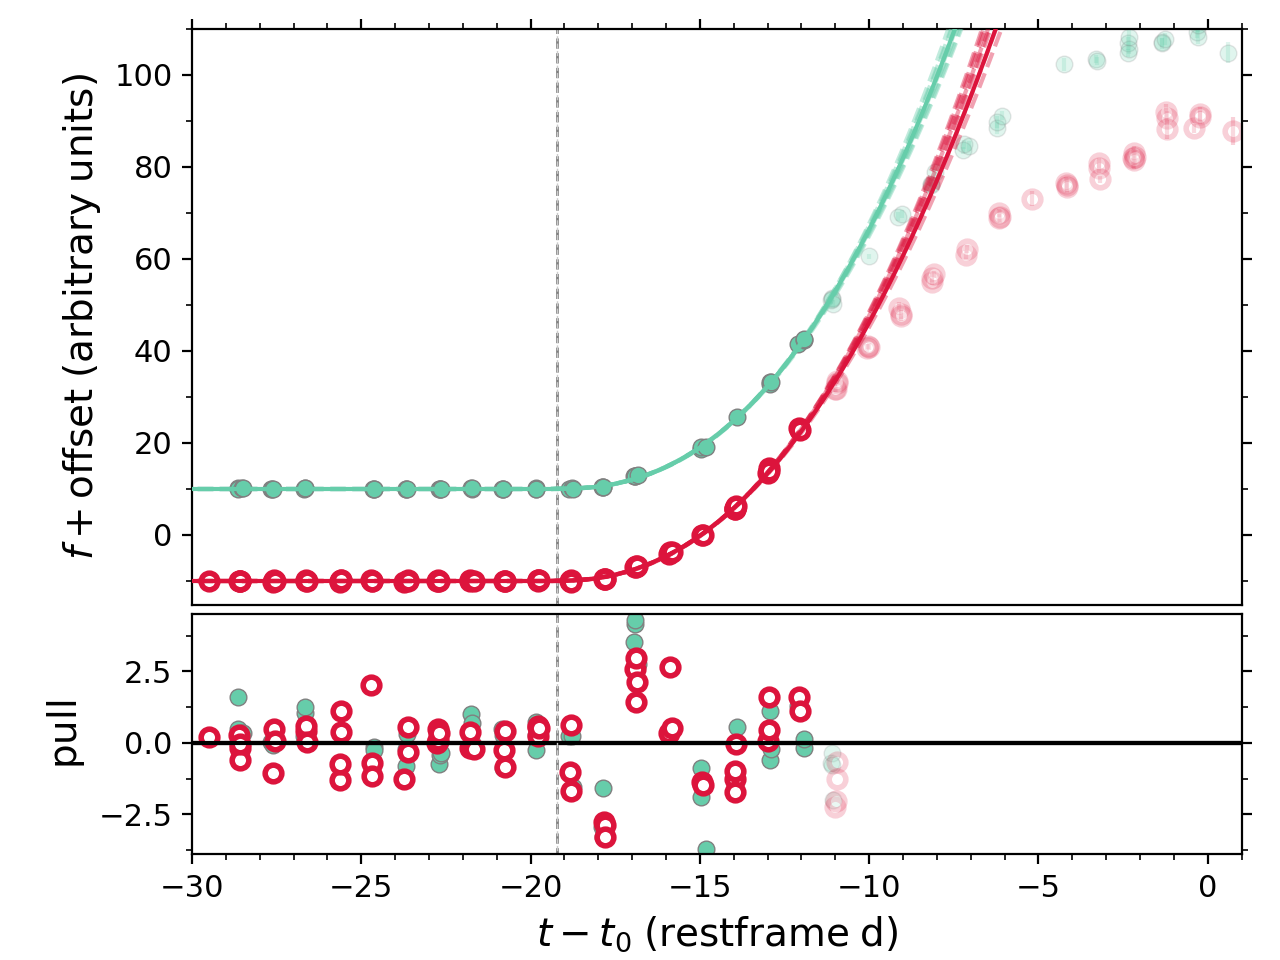

In [4]:
thin_by = 250
rel_flux_cutoff = 0.4

sn = 'ZTF18abauprj'

h5_file = info_path + 'big_unc/{}_emcee_40_varchange.h5'.format(sn)
reader = emcee.backends.HDFBackend(h5_file)
nsteps = thin_by*np.shape(reader.get_chain())[0]
tau = reader.get_autocorr_time(tol=0)
burnin = int(5*np.max(tau))
samples = reader.get_chain(discard=burnin, thin=np.max([int(np.max(tau)), 1]), flat=True)
lnpost = reader.get_log_prob(discard=burnin, thin=np.max([int(np.max(tau)), 1]), flat=True)


t_max = float(salt_df['t0_g_adopted'][salt_df['name'] == sn].values)
z = float(salt_df['z_adopt'][salt_df['name'] == sn].values)
g_max = float(salt_df['fratio_gmax_2adam'][salt_df['name'] == sn].values)
r_max = float(salt_df['fratio_rmax_2adam'][salt_df['name'] == sn].values)

t_data, f_data, f_unc_data, fcqfid_data, plot_obs = prep_light_curve(info_path+"{}_force_phot.h5".format(sn),
                                                                     t_max=t_max, 
                                                                     z=z,
                                                                     g_max=g_max,
                                                                     r_max=r_max,
                                                                     rel_flux_cutoff=rel_flux_cutoff, 
                                                                     return_masked=True)

max_posterior = samples[np.argmax(lnpost)]
haha = plot_both_filt(max_posterior, t_data, f_data, f_unc_data, fcqfid_data, plot_obs,
                      samples, np.random.choice(range(len(samples)), 8, replace=False))

#### Example 2

ZTF18abkudjo has a grabage light curve with very few points on the rise.

<IPython.core.display.Javascript object>


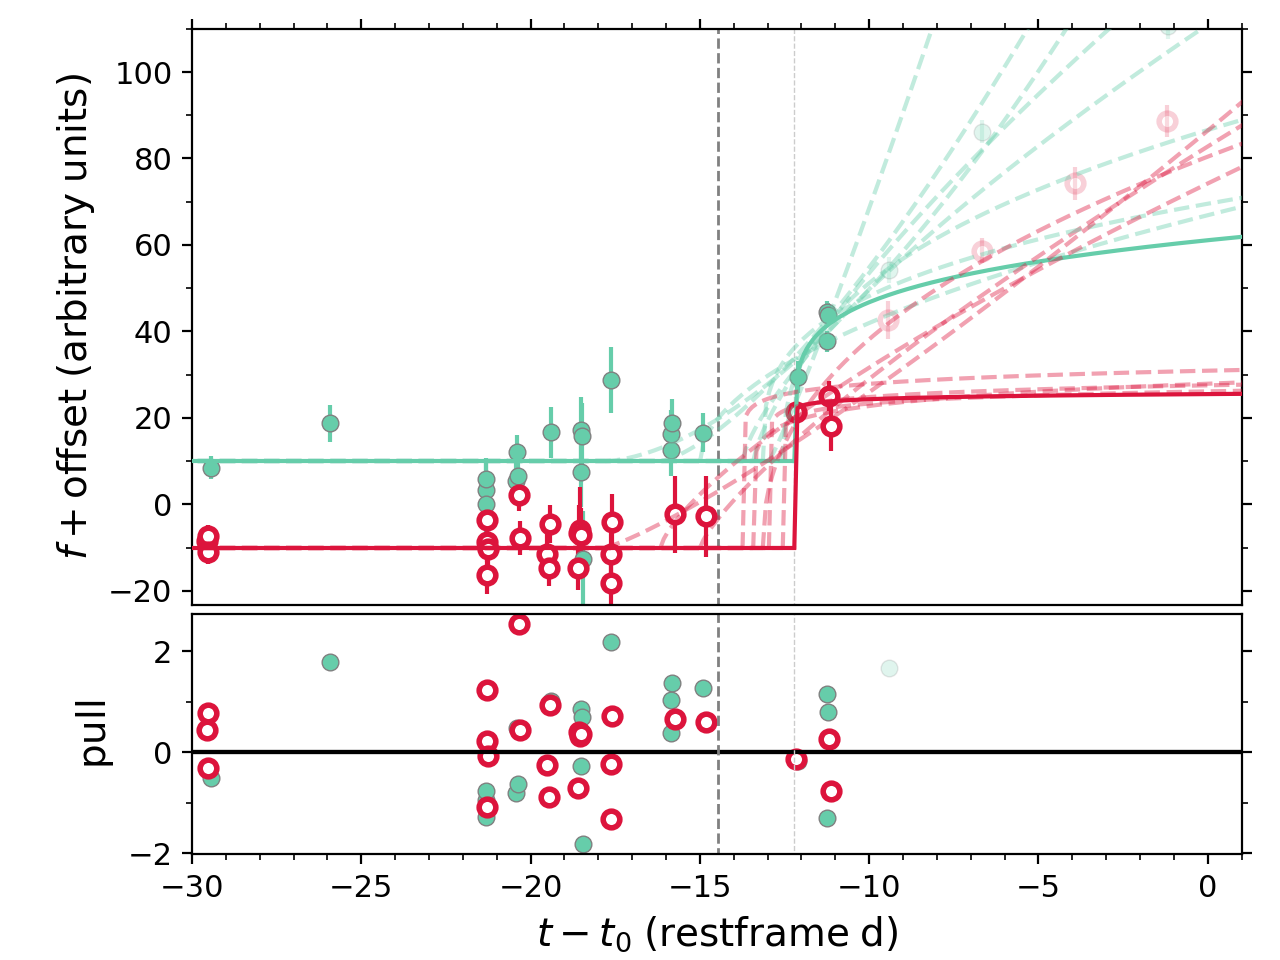

In [6]:
sn = 'ZTF18abkudjo'

h5_file = info_path + 'big_unc/{}_emcee_40_varchange.h5'.format(sn)
reader = emcee.backends.HDFBackend(h5_file)
nsteps = thin_by*np.shape(reader.get_chain())[0]
tau = reader.get_autocorr_time(tol=0)
burnin = int(5*np.max(tau))
samples = reader.get_chain(discard=burnin, thin=np.max([int(np.max(tau)), 1]), flat=True)
lnpost = reader.get_log_prob(discard=burnin, thin=np.max([int(np.max(tau)), 1]), flat=True)


t_max = float(salt_df['t0_g_adopted'][salt_df['name'] == sn].values)
z = float(salt_df['z_adopt'][salt_df['name'] == sn].values)
g_max = float(salt_df['fratio_gmax_2adam'][salt_df['name'] == sn].values)
r_max = float(salt_df['fratio_rmax_2adam'][salt_df['name'] == sn].values)

t_data, f_data, f_unc_data, fcqfid_data, plot_obs = prep_light_curve(info_path+"{}_force_phot.h5".format(sn),
                                                                     t_max=t_max, 
                                                                     z=z,
                                                                     g_max=g_max,
                                                                     r_max=r_max,
                                                                     rel_flux_cutoff=rel_flux_cutoff, 
                                                                     return_masked=True)

max_posterior = samples[np.argmax(lnpost)]
haha = plot_both_filt(max_posterior, t_data, f_data, f_unc_data, fcqfid_data, plot_obs,
                      samples, np.random.choice(range(len(samples)), 8, replace=False))

## Measure the gaps

## What about fact that results should be $\chi^2$ distributed?

In practice - the term that inflates the uncertainties 